# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2022.01.05

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_0\20220209-P_brain_CTP11-1000_CTP12_from_0204

This data is DNA of uncleared MERFISH RNA:
    \\10.245.74.158\Chromatin_NAS_0\20220204-P_brain_M1_nonclear


In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

30456


# 0. fov parameters

In [3]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_0\20220209-P_brain_CTP11-1000_CTP12_from_0204',
             'save_folder':r'\\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204',
             'experiment_type': 'DNA',
             'num_threads': 16,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':10,
                     'max_num_seeds': None,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             }


In [6]:
_overwrite = False
sel_fov_ids = np.arange(0, 42) # hemisphere1

for _fov_id in sel_fov_ids:

    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False, # whether overwrite
                                              )
    
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process image into candidate spots
    fov.parallel = True
    fov.unique_ref_id = 0
    fov._process_image_to_spots('unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 4. Process DAPI image
    fov._load_dapi_image()
    

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 32
- Number of field of views: 169
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_0\20220209-P_brain_CTP11-1000_CTP12_from_0204\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12', 'H62U13', 'H63U14'])
- 32 folders are found according to color-usage annotation.
+ loading fov_info from 

++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_002.hdf5
++ base attributes loaded:[] in 0.013s.
-- folders not selected, allow processing all 33 folders
-- checking combo, region:[1 2] in 0.073s.
-- checking combo, region:[3 4] in 0.031s.
-- checking combo, region:[5 6] in 0.041s.
-- checking combo, region:[7 8] in 0.042s.
-- checking combo, region:[ 9 10] in 0.041s.
-- checking combo, region:[11 12] in 0.033s.
-- checking combo, region:[13 14] in 0.070s.
-- checking combo, region:[15 16] in 0.036s.
-- checking combo, region:[17 18] in 0.039s.
-- checking combo, region:[19 20] in 0.033s.
-- checking combo, region:[21 22] in 0.032s.
-- checking combo, region:[23 24] in 0.034s.
-- checking combo, region:[25 26] in 0.034s.
-- che

-- checking combo, region:[39 40] in 0.047s.
-- checking combo, region:[41 42] in 0.041s.
-- checking combo, region:[43 44] in 0.029s.
-- checking combo, region:[45 46] in 0.031s.
-- checking combo, region:[47 48] in 0.033s.
-- checking combo, region:[49 50] in 0.035s.
-- checking combo, region:[51 52] in 0.031s.
-- checking combo, region:[53 54] in 0.016s.
-- checking combo, region:[55 56] in 0.021s.
-- checking combo, region:[57 58] in 0.017s.
-- checking combo, region:[59 60] in 0.016s.
-- checking combo, region:[61 62] in 0.016s.
-- checking combo, region:[63 64] in 0.031s.
-- checking combo, region:[65 66] in 0.016s.
+ Start multi-processing of pre-processing for 9 images with 16 threads
++ processing combo ids: [49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66] , finish in 1649.33s.
-- folders not selected, allow processing all 33 folders
- No unique images and spots requires processing, skip.
directly return existing attribute.
Get Folder Names: (ia.get_img_info.get_folders

- 33 folders are found according to color-usage annotation.
+ loading fov_info from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_007.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 4.304s.
+ loading correction from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_007.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_007.hdf5
++ base attributes loaded:[] in 0.018s.
-- folders not selected, allow processing all 33 folders
-- checking combo, region:[1 2] in 0.051s.
-- checking combo, region:[3 4] in 0.031s.
-- checking combo, region:[5 6] in 0.031s.
-- checking c

-- checking combo, region:[17 18] in 0.031s.
-- checking combo, region:[19 20] in 0.016s.
-- checking combo, region:[21 22] in 0.021s.
-- checking combo, region:[23 24] in 0.033s.
-- checking combo, region:[25 26] in 0.016s.
-- checking combo, region:[27 28] in 0.047s.
-- checking combo, region:[29 30] in 0.021s.
-- checking combo, region:[31 32] in 0.031s.
-- checking combo, region:[33 34] in 0.031s.
-- checking combo, region:[35 36] in 0.023s.
-- checking combo, region:[37 38] in 0.031s.
-- checking combo, region:[39 40] in 0.038s.
-- checking combo, region:[41 42] in 0.016s.
-- checking combo, region:[43 44] in 0.030s.
-- checking combo, region:[45 46] in 0.031s.
-- checking combo, region:[47 48] in 0.016s.
-- checking combo, region:[49 50] in 0.031s.
-- checking combo, region:[51 52] in 0.023s.
-- checking combo, region:[53 54] in 0.016s.
-- checking combo, region:[55 56] in 0.016s.
-- checking combo, region:[57 58] in 0.016s.
-- checking combo, region:[59 60] in 0.016s.
-- checkin

-- checking combo, region:[65 66] in 0.018s.
+ Start multi-processing of pre-processing for 8 images with 16 threads
++ processing combo ids: [51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66] , finish in 1132.98s.
-- folders not selected, allow processing all 33 folders
- No unique images and spots requires processing, skip.
directly return existing attribute.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 33
- Number of field of views: 169
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_0\20220209-P_brain_CTP11-1000_CTP12_from_0204\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H3

++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 4.251s.
+ loading correction from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_014.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_014.hdf5
++ base attributes loaded:[] in 0.010s.
-- folders not selected, allow processing all 33 folders
-- checking combo, region:[1 2] in 0.047s.
-- checking combo, region:[3 4] in 0.039s.
-- checking combo, region:[5 6] in 0.029s.
-- checking combo, region:[7 8] in 0.023s.
-- checking combo, region:[ 9 10] in 0.031s.
-- checking combo, region:[11 12] in 0.029s.
-- checking combo, region:[13 14] in 0.044s.
-- checking com

-- checking combo, region:[29 30] in 0.020s.
-- checking combo, region:[31 32] in 0.031s.
-- checking combo, region:[33 34] in 0.021s.
-- checking combo, region:[35 36] in 0.031s.
-- checking combo, region:[37 38] in 0.020s.
-- checking combo, region:[39 40] in 0.041s.
-- checking combo, region:[41 42] in 0.029s.
-- checking combo, region:[43 44] in 0.023s.
-- checking combo, region:[45 46] in 0.029s.
-- checking combo, region:[47 48] in 0.018s.
-- checking combo, region:[49 50] in 0.024s.
-- checking combo, region:[51 52] in 0.016s.
-- checking combo, region:[53 54] in 0.016s.
-- checking combo, region:[55 56] in 0.011s.
-- checking combo, region:[57 58] in 0.016s.
-- checking combo, region:[59 60] in 0.016s.
-- checking combo, region:[61 62] in 0.016s.
-- checking combo, region:[63 64] in 0.032s.
-- checking combo, region:[65 66] in 0.016s.
+ Start multi-processing of pre-processing for 7 images with 16 threads
++ processing combo ids: [53 54 55 56 57 58 59 60 61 62 63 64 65 66] , fi

- 33 folders are found according to color-usage annotation.
+ loading fov_info from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_019.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 4.234s.
+ loading correction from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_019.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_019.hdf5
++ base attributes loaded:[] in 0.009s.
-- folders not selected, allow processing all 33 folders
-- checking combo, region:[1 2] in 0.057s.
-- checking combo, region:[3 4] in 0.031s.
-- checking combo, region:[5 6] in 0.032s.
-- checking c

-- checking combo, region:[19 20] in 0.031s.
-- checking combo, region:[21 22] in 0.023s.
-- checking combo, region:[23 24] in 0.015s.
-- checking combo, region:[25 26] in 0.016s.
-- checking combo, region:[27 28] in 0.031s.
-- checking combo, region:[29 30] in 0.038s.
-- checking combo, region:[31 32] in 0.016s.
-- checking combo, region:[33 34] in 0.031s.
-- checking combo, region:[35 36] in 0.017s.
-- checking combo, region:[37 38] in 0.031s.
-- checking combo, region:[39 40] in 0.039s.
-- checking combo, region:[41 42] in 0.016s.
-- checking combo, region:[43 44] in 0.031s.
-- checking combo, region:[45 46] in 0.029s.
-- checking combo, region:[47 48] in 0.023s.
-- checking combo, region:[49 50] in 0.029s.
-- checking combo, region:[51 52] in 0.023s.
-- checking combo, region:[53 54] in 0.031s.
-- checking combo, region:[55 56] in 0.020s.
-- checking combo, region:[57 58] in 0.020s.
-- checking combo, region:[59 60] in 0.027s.
-- checking combo, region:[61 62] in 0.016s.
-- checkin

++ processing combo ids: [57 58 59 60 61 62 63 64 65 66] , finish in 901.08s.
-- folders not selected, allow processing all 33 folders
- No unique images and spots requires processing, skip.
directly return existing attribute.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 33
- Number of field of views: 169
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_0\20220209-P_brain_CTP11-1000_CTP12_from_0204\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49',

- 33 folders are found according to color-usage annotation.
+ loading fov_info from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_026.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 4.244s.
+ loading correction from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_026.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_026.hdf5
++ base attributes loaded:[] in 0.008s.
-- folders not selected, allow processing all 33 folders
-- checking combo, region:[1 2] in 0.031s.
-- checking combo, region:[3 4] in 0.024s.
-- checking combo, region:[5 6] in 0.020s.
-- checking c

-- checking combo, region:[17 18] in 0.036s.
-- checking combo, region:[19 20] in 0.023s.
-- checking combo, region:[21 22] in 0.031s.
-- checking combo, region:[23 24] in 0.016s.
-- checking combo, region:[25 26] in 0.043s.
-- checking combo, region:[27 28] in 0.041s.
-- checking combo, region:[29 30] in 0.020s.
-- checking combo, region:[31 32] in 0.033s.
-- checking combo, region:[33 34] in 0.028s.
-- checking combo, region:[35 36] in 0.022s.
-- checking combo, region:[37 38] in 0.031s.
-- checking combo, region:[39 40] in 0.029s.
-- checking combo, region:[41 42] in 0.026s.
-- checking combo, region:[43 44] in 0.031s.
-- checking combo, region:[45 46] in 0.016s.
-- checking combo, region:[47 48] in 0.031s.
-- checking combo, region:[49 50] in 0.022s.
-- checking combo, region:[51 52] in 0.023s.
-- checking combo, region:[53 54] in 0.031s.
-- checking combo, region:[55 56] in 0.030s.
-- checking combo, region:[57 58] in 0.031s.
-- checking combo, region:[59 60] in 0.016s.
-- checkin

-- checking combo, region:[65 66] in 0.038s.
+ Start multi-processing of pre-processing for 4 images with 16 threads
++ processing combo ids: [59 60 61 62 63 64 65 66] , finish in 894.65s.
-- folders not selected, allow processing all 33 folders
- No unique images and spots requires processing, skip.
directly return existing attribute.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 33
- Number of field of views: 169
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_0\20220209-P_brain_CTP11-1000_CTP12_from_0204\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38'

- 33 folders are found according to color-usage annotation.
+ loading fov_info from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_033.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 4.231s.
+ loading correction from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_033.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_033.hdf5
++ base attributes loaded:[] in 0.038s.
-- folders not selected, allow processing all 33 folders
-- checking combo, region:[1 2] in 0.047s.
-- checking combo, region:[3 4] in 0.026s.
-- checking combo, region:[5 6] in 0.027s.
-- checking c

-- checking combo, region:[21 22] in 0.023s.
-- checking combo, region:[23 24] in 0.021s.
-- checking combo, region:[25 26] in 0.020s.
-- checking combo, region:[27 28] in 0.059s.
-- checking combo, region:[29 30] in 0.033s.
-- checking combo, region:[31 32] in 0.029s.
-- checking combo, region:[33 34] in 0.039s.
-- checking combo, region:[35 36] in 0.034s.
-- checking combo, region:[37 38] in 0.031s.
-- checking combo, region:[39 40] in 0.041s.
-- checking combo, region:[41 42] in 0.021s.
-- checking combo, region:[43 44] in 0.021s.
-- checking combo, region:[45 46] in 0.021s.
-- checking combo, region:[47 48] in 0.033s.
-- checking combo, region:[49 50] in 0.019s.
-- checking combo, region:[51 52] in 0.016s.
-- checking combo, region:[53 54] in 0.031s.
-- checking combo, region:[55 56] in 0.031s.
-- checking combo, region:[57 58] in 0.021s.
-- checking combo, region:[59 60] in 0.016s.
-- checking combo, region:[61 62] in 0.027s.
-- checking combo, region:[63 64] in 0.016s.
-- checkin

++ processing combo ids: [63 64 65 66] , finish in 328.50s.
-- folders not selected, allow processing all 33 folders
- No unique images and spots requires processing, skip.
directly return existing attribute.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 33
- Number of field of views: 169
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_0\20220209-P_brain_CTP11-1000_CTP12_from_0204\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1'

+ loading fov_info from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_040.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 5.661s.
+ loading correction from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_040.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_040.hdf5
++ base attributes loaded:[] in 0.012s.
-- folders not selected, allow processing all 33 folders
-- checking combo, region:[1 2] in 0.047s.
-- checking combo, region:[3 4] in 0.016s.
-- checking combo, region:[5 6] in 0.022s.
-- checking combo, region:[7 8] in 0.018s.
-- checking combo, region:[ 9 

## check drifts

### re-calculate drifts

In [21]:
bead0 = fov._load_bead_image(0, _warp=False)
bead1 = fov._load_bead_image(1, _warp=False)

reload(correction_tools.alignment)
correction_tools.alignment.align_image(bead0, bead1,
                                       correction_args={'single_im_size':[50,2048,2048]})

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20220209-P_brain_CTP11-1000_CTP12_from_0204\H0C1\Conv_zscan_000.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_0\20220209-P_brain_CTP11-1000_CTP12_from_0204\H0C1\Conv_zscan_000.dax  in 3.379s
-- removing hot pixels for channels:['488'] in 5.003s
-- illumination correction for channels: 488, in 1.702s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.448s


### check warpped beads image

In [36]:
sel_bits = [1,3,5,7,9,11,13,15,17]
bead_ims = fov._load_bead_ims_for_bits(sel_bits, 'combo')

+ loading combo from file: \\franklin\SSD_01\Pu_Temp\20220209-P_brain_CTP11-1000_CTP12_from_0204\Conv_zscan_000.hdf5
++ finish loading combo in 0.113s. 
- Start multiprocessing process 9 bead_ims with 16 threads in 200.237s.


<IPython.core.display.Javascript object>


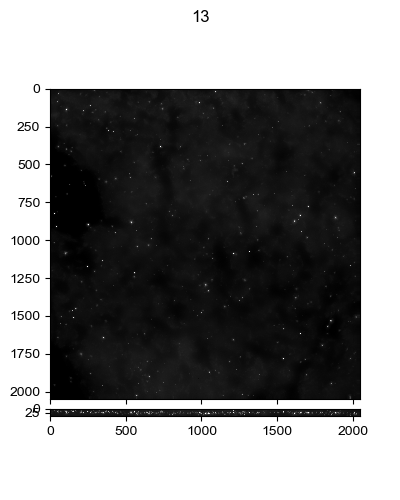

In [37]:
visual_tools.imshow_mark_3d_v2(bead_ims, image_names=sel_bits)

In [40]:
sel_bits

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [42]:
sel_inds = np.arange(0,18)

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    sel_combo_ims = _grp['ims'][sel_inds]
    sel_combo_ids = _grp['ids'][sel_inds]

<IPython.core.display.Javascript object>


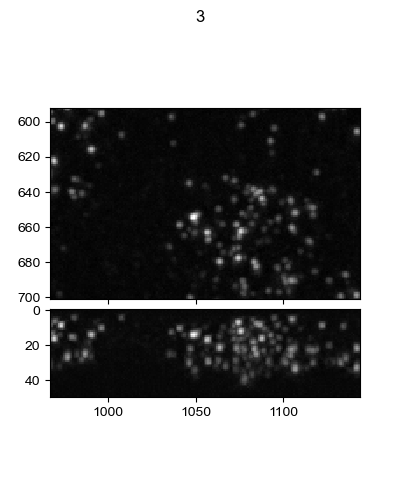

In [43]:
visual_tools.imshow_mark_3d_v2(sel_combo_ims, 
                               image_names=sel_combo_ids)

## Check fitted spots

In [8]:
from ImageAnalysis3.classes.preprocess import Spots3D, ImageCrop_3d, SpotTuple

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    combo_ids = _grp['ids'][:]
    raw_combo_spots_list = [Spots3D(_spots[_spots[:,0]>0], bits= _id)
                                    for _id, _spots in zip(combo_ids, _grp['raw_spots'][:])]

In [ ]:
spots_imshow_dict = {'coords':[],
                     'class_ids':[],
                    }

for _i,_spots in enumerate(raw_combo_spots_list):
    spots_imshow_dict['coords'].extend(list(np.fliplr(_spots.to_coords())))
    #spots_imshow_dict['class_ids'].extend(list(_spots.bits))
    spots_imshow_dict['class_ids'].extend(list(_i * np.ones(len(_spots), dtype=np.int32)))

visual_tools.imshow_mark_3d_v2(combo_ims, given_dic=spots_imshow_dict)

In [13]:
fov._load_from_file('combo')

+ loading combo from file: \\franklin\SSD_01\Pu_Temp\20220102-CTP11-1000_CTP12-DNA_from_1229\Conv_zscan_000.hdf5
++ finish loading combo in 0.290s. 


<IPython.core.display.Javascript object>


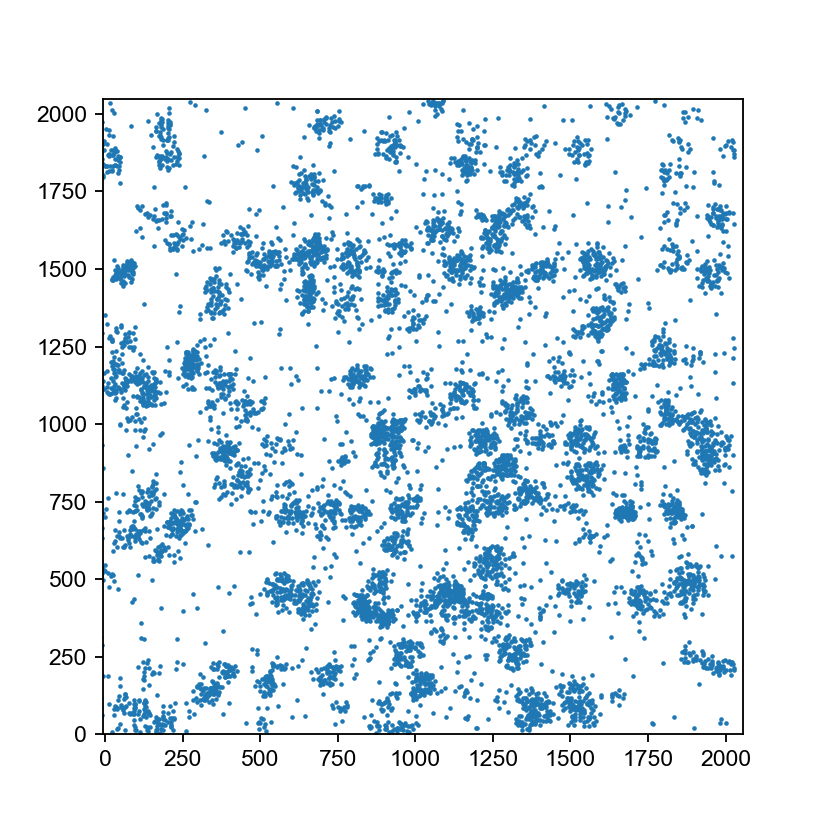

(8083, 8089)

In [14]:
plt.figure(figsize=(5,5),dpi=150)
spots = fov.combo_spots_list[3]
sel_inds = spots[:,0] > 2500
plt.scatter(spots[sel_inds,3], spots[sel_inds,2], s=1)
plt.axis('equal')
plt.xlim([0,2048])
plt.ylim([0,2048])
plt.show()
np.sum(sel_inds), len(sel_inds)

In [18]:
_spots = fov.combo_spots_list[0]

np.fliplr(_spots[:,1:4])

array([[1789.5247  ,  385.87903 ,   34.284603],
       [1793.5173  ,  382.88458 ,   44.16711 ],
       [1766.4695  ,  405.92477 ,   43.181324],
       ...,
       [1542.2552  ,  938.9768  ,   26.992361],
       [ 157.19456 , 1097.7567  ,   16.8031  ],
       [1252.3534  ,  543.1731  ,   10.336489]], dtype=float32)

In [ ]:
spots_dict = {'coords':[np.flipud(_spots) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

<IPython.core.display.Javascript object>


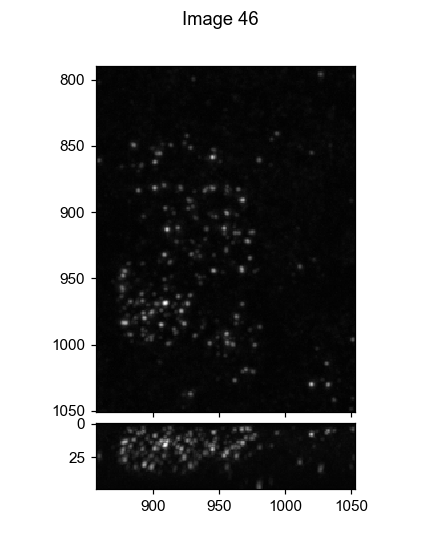

In [10]:
visual_tools.imshow_mark_3d_v2(combo_ims)